In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D,Dropout
import random

In [2]:
#load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


In [4]:
x_train[0].min(), x_train[0].max()

(0, 255)

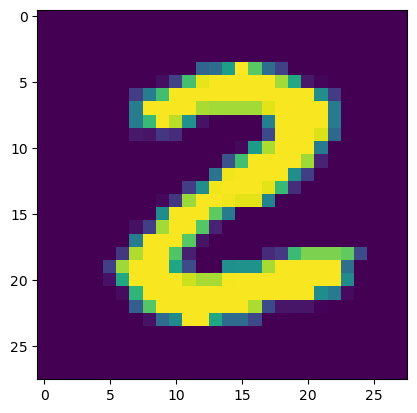

2


In [5]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

In [6]:
#reshape the data even if not works
#why and how this works
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [7]:
'''The original shape of the MNIST dataset images is (28, 28), 
meaning each image is represented as a 2D array of 28x28 pixels. 
However, convolutional neural networks (CNNs) expect input data to have 3 dimensions:

Height: 28 (height of the image)
Width: 28 (width of the image)
Channels: 1 (since it's a grayscale image, there is only one channel)
For CNNs, the input data shape needs to be 4-dimensional:
(number of samples, height, width, channels)
How does reshaping work?

x_train.shape[0] gives the number of samples (e.g., 60,000 for x_train).
reshape(x_train.shape[0], 28, 28, 1) adds a new dimension to represent the color
channels, making the input compatible with the CNN.

By default, the MNIST dataset may be loaded with an integer data type (uint8), where each 
pixel value is between 0 and 255. Neural networks typically work better with floating-point
numbers (usually float32), especially when the input is normalized.

The astype('float32') function converts the pixel values from integers to 32-bit 
floating-point numbers, which are more appropriate for training neural networks.
Why Scaling is Important:

You didn't include the scaling part in your question, but in practice, 
it comes after the conversion to float32:

'''


"The original shape of the MNIST dataset images is (28, 28), \nmeaning each image is represented as a 2D array of 28x28 pixels. \nHowever, convolutional neural networks (CNNs) expect input data to have 3 dimensions:\n\nHeight: 28 (height of the image)\nWidth: 28 (width of the image)\nChannels: 1 (since it's a grayscale image, there is only one channel)\nFor CNNs, the input data shape needs to be 4-dimensional:\n(number of samples, height, width, channels)\nHow does reshaping work?\n\nx_train.shape[0] gives the number of samples (e.g., 60,000 for x_train).\nreshape(x_train.shape[0], 28, 28, 1) adds a new dimension to represent the color\nchannels, making the input compatible with the CNN.\n\nBy default, the MNIST dataset may be loaded with an integer data type (uint8), where each \npixel value is between 0 and 255. Neural networks typically work better with floating-point\nnumbers (usually float32), especially when the input is normalized.\n\nThe astype('float32') function converts the 

In [8]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [9]:
#defining model
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dropout(0.3),   
 Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [10]:
model.compile(
 optimizer='adam', 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)

In [11]:
history = model.fit(x_train, y_train, epochs=3, 
                     validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2101 - accuracy: 0.9386 - val_loss: 0.0644 - val_accuracy: 0.9777
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0586 - val_accuracy: 0.9796
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0450 - val_accuracy: 0.9855


In [12]:
#estimating model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9855
Test accuracy: 0.985
Test loss: 0.045


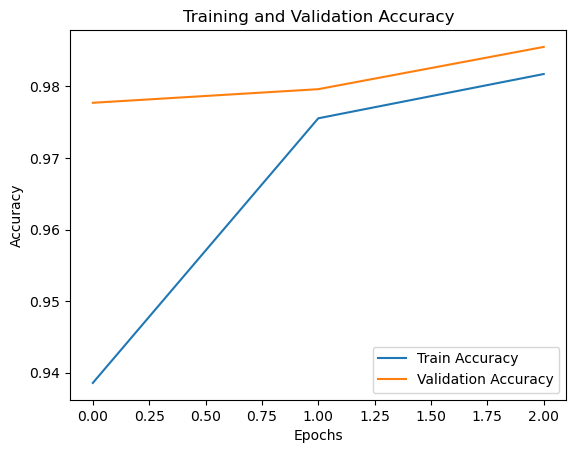

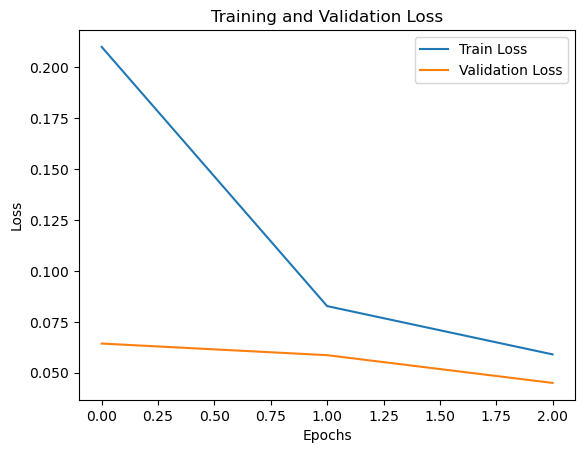

In [13]:
# Plotting training and validation loss/accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
def classify(): 
    n = random.randint(0, 9999)  # Randomly select an image from the test set

    # Reshape the image to match the model's input shape
    image = x_test[n].reshape(1, 28, 28, 1)

    # Predict the class of the image
    predicted_value = model.predict(image)
    predicted_class = np.argmax(predicted_value)  # Get the predicted class (index with the highest probability)

    # Get the actual class (the true label)
    actual_class = y_test[n]

    # Display the image with its predicted and actual class
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[n].reshape(28, 28))
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.show()

  
    print(f"Predicted Probabilities: {predicted_value}")
   

1/1 [==============================] - 0s 58ms/step


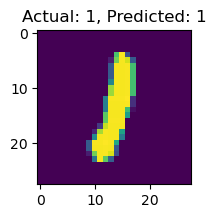

Predicted Probabilities: [[2.0331514e-05 9.9977738e-01 2.4509243e-05 3.3842374e-05 1.5452390e-05
  2.1493770e-06 9.3046594e-07 6.1243401e-05 3.3499204e-05 3.0571089e-05]]
1/1 [==============================] - 0s 36ms/step


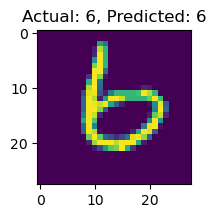

Predicted Probabilities: [[7.8235809e-07 1.6869250e-09 6.0659233e-09 1.2155379e-09 4.1980456e-07
  1.3960909e-06 9.9999702e-01 2.7073539e-09 3.9637732e-07 3.1584493e-10]]
1/1 [==============================] - 0s 32ms/step


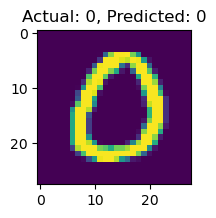

Predicted Probabilities: [[9.9999166e-01 2.3848978e-09 2.3859820e-06 9.6305541e-09 9.7338450e-08
  1.8271146e-07 4.1472972e-06 8.2651913e-10 6.8404796e-07 7.7745619e-07]]
1/1 [==============================] - 0s 26ms/step


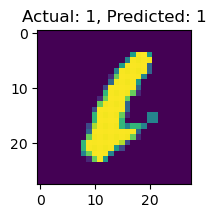

Predicted Probabilities: [[1.4928776e-04 8.2663405e-01 1.0549687e-01 4.6476000e-03 8.9022267e-04
  2.0546908e-04 5.9860874e-02 4.4499079e-04 1.6699317e-03 7.1025880e-07]]
1/1 [==============================] - 0s 41ms/step


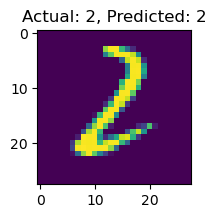

Predicted Probabilities: [[4.2201513e-09 8.1296885e-06 9.9913722e-01 8.2919863e-04 4.3790232e-13
  2.2364563e-11 7.6203649e-10 1.9655516e-05 5.8316759e-06 7.0088831e-12]]


In [39]:

for i in range(0,5):
    classify()
